## [作業重點]
目前你應該已經要很清楚資料集中，資料的型態是什麼樣子囉！包含特徵 (features) 與標籤 (labels)。因此要記得未來不管什麼專案，必須要把資料清理成相同的格式，才能送進模型訓練。
今天的作業開始踏入決策樹這個非常重要的模型，請務必確保你理解模型中每個超參數的意思，並試著調整看看，對最終預測結果的影響為何

## 作業

1. 試著調整 DecisionTreeClassifier(...) 中的參數，並觀察是否會改變結果？
2. 改用其他資料集 (boston, wine)，並與回歸模型的結果進行比較

In [1]:
from sklearn import datasets, metrics

# 如果是分類問題，請使用 DecisionTreeClassifier，若為回歸問題，請使用 DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

/Users/jianweicheng/anaconda3/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


### Boston

#### 讀取資料

In [2]:
# 讀取波士頓資料集
boston = datasets.load_boston()
len(boston.data)

506

#### 設定參數

In [3]:
max_depth = [2, 3, 4]
min_samples_split = [5, 15, 25]
min_samples_lear = [5, 20, 35]

In [4]:

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.25, random_state=4)
# for a, b, c in zip(max_depth, min_samples_split, min_samples_lear):
for a in max_depth:
    for b in min_samples_split:
        for c in min_samples_lear:
            # 建立模型
            print("max_depth:", a, "\t")
            print("min_samples_split", b, "\t")
            print("min_samples_leaf", c, "\t")
            reg = DecisionTreeRegressor(max_depth = a, min_samples_split= b, min_samples_leaf= c)

            # 訓練模型
            reg.fit(x_train, y_train)

            # 預測測試集
            y_pred = reg.predict(x_test)

            print("Mean squared error: %.2f"
                  % mean_squared_error(y_test, y_pred),"\n")

            

max_depth: 2 	
min_samples_split 5 	
min_samples_leaf 5 	
Mean squared error: 35.76 

max_depth: 2 	
min_samples_split 5 	
min_samples_leaf 20 	
Mean squared error: 34.79 

max_depth: 2 	
min_samples_split 5 	
min_samples_leaf 35 	
Mean squared error: 41.99 

max_depth: 2 	
min_samples_split 15 	
min_samples_leaf 5 	
Mean squared error: 35.76 

max_depth: 2 	
min_samples_split 15 	
min_samples_leaf 20 	
Mean squared error: 34.79 

max_depth: 2 	
min_samples_split 15 	
min_samples_leaf 35 	
Mean squared error: 41.99 

max_depth: 2 	
min_samples_split 25 	
min_samples_leaf 5 	
Mean squared error: 35.76 

max_depth: 2 	
min_samples_split 25 	
min_samples_leaf 20 	
Mean squared error: 34.79 

max_depth: 2 	
min_samples_split 25 	
min_samples_leaf 35 	
Mean squared error: 41.99 

max_depth: 3 	
min_samples_split 5 	
min_samples_leaf 5 	
Mean squared error: 27.77 

max_depth: 3 	
min_samples_split 5 	
min_samples_leaf 20 	
Mean squared error: 25.68 

max_depth: 3 	
min_samples_split 5 	
min_

MSE最小的參數組合為：	
max_depth: 4 	
min_samples_split 25 	
min_samples_leaf 5 	
Mean squared error: 22.09 

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Feature importance:  [0.04843894 0.         0.         0.         0.         0.64923185
 0.         0.02647688 0.         0.         0.00770198 0.
 0.26815035]


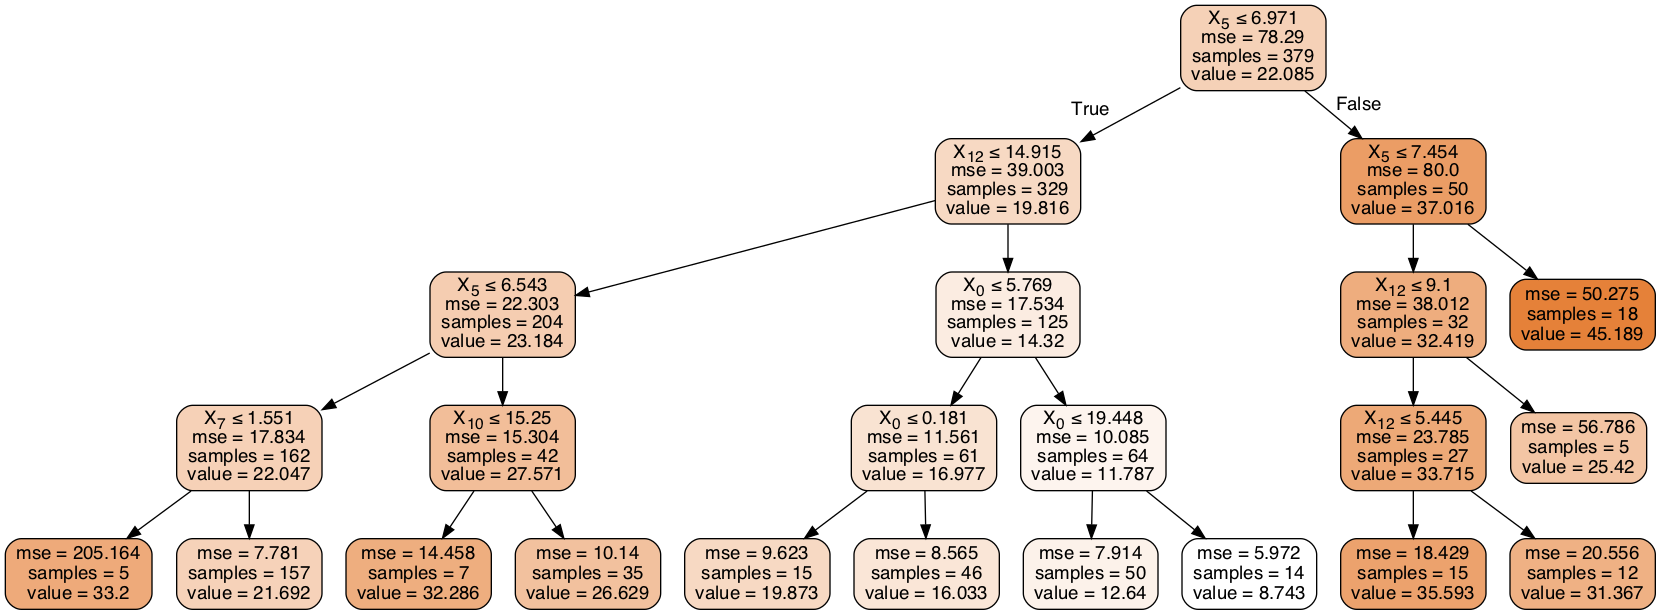

In [5]:
print("MSE最小的參數組合為：\t")
print("max_depth:", 4, "\t")
print("min_samples_split", 25, "\t")
print("min_samples_leaf", 5, "\t")
reg = DecisionTreeRegressor(max_depth = 4, min_samples_split= 25, min_samples_leaf= 5)

reg.fit(x_train, y_train)

# 預測測試集
y_pred = reg.predict(x_test)

print("Mean squared error: %.2f"
% mean_squared_error(y_test, y_pred),"\n")

print(boston.feature_names)

print("Feature importance: ", reg.feature_importances_)

dot_data = StringIO()
export_graphviz(reg, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Wine

#### 讀取資料

In [6]:
# 讀取鳶尾花資料集
wine = datasets.load_wine()
len(wine.data)

178

In [7]:

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)
for a in max_depth:
    for b in min_samples_split:
        for c in min_samples_lear:
            # 建立模型
            print("max_depth:", a, "\t")
            print("min_samples_split", b, "\t")
            print("min_samples_leaf", c, "\t")
            clf = DecisionTreeClassifier(max_depth = a, min_samples_split= b, min_samples_leaf= c)
            # 切分訓練集/測試集
            x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

            # 建立模型
            clf = DecisionTreeClassifier()

            # 訓練模型
            clf.fit(x_train, y_train)

            # 預測測試集
            y_pred = clf.predict(x_test)

            acc = metrics.accuracy_score(y_test, y_pred)
            print("Acuuracy: ", acc, "\n")

max_depth: 2 	
min_samples_split 5 	
min_samples_leaf 5 	
Acuuracy:  0.9111111111111111 

max_depth: 2 	
min_samples_split 5 	
min_samples_leaf 20 	
Acuuracy:  0.8888888888888888 

max_depth: 2 	
min_samples_split 5 	
min_samples_leaf 35 	
Acuuracy:  0.8666666666666667 

max_depth: 2 	
min_samples_split 15 	
min_samples_leaf 5 	
Acuuracy:  0.8666666666666667 

max_depth: 2 	
min_samples_split 15 	
min_samples_leaf 20 	
Acuuracy:  0.8888888888888888 

max_depth: 2 	
min_samples_split 15 	
min_samples_leaf 35 	
Acuuracy:  0.9111111111111111 

max_depth: 2 	
min_samples_split 25 	
min_samples_leaf 5 	
Acuuracy:  0.8888888888888888 

max_depth: 2 	
min_samples_split 25 	
min_samples_leaf 20 	
Acuuracy:  0.8666666666666667 

max_depth: 2 	
min_samples_split 25 	
min_samples_leaf 35 	
Acuuracy:  0.9111111111111111 

max_depth: 3 	
min_samples_split 5 	
min_samples_leaf 5 	
Acuuracy:  0.8666666666666667 

max_depth: 3 	
min_samples_split 5 	
min_samples_leaf 20 	
Acuuracy:  0.8888888888888888

Accuracy最高為0.91，故取其中一組來做圖：
max_depth: 2 	
min_samples_split 5 	
min_samples_leaf 20 

Acuuracy:  0.8444444444444444
['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Feature importance:  [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.44880491 0.         0.
 0.55119509]


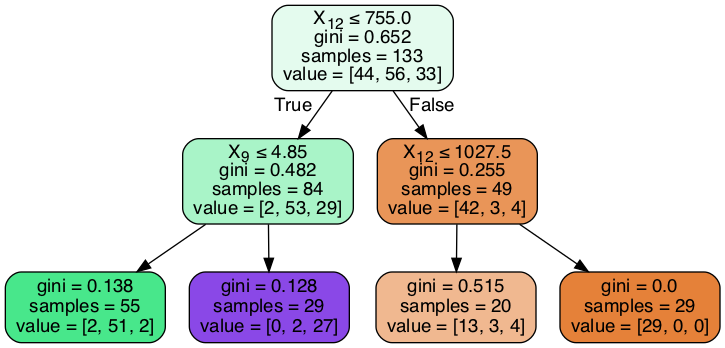

In [8]:
print("Accuracy最高為0.91，故取其中一組來做圖：")
print("max_depth:", 2, "\t")
print("min_samples_split", 5, "\t")
print("min_samples_leaf", 20, "\n")

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=4)

# 建立模型
clf = DecisionTreeClassifier(max_depth = 2, min_samples_split= 5, min_samples_leaf= 20)

# 訓練模型
clf.fit(x_train, y_train)

# 預測測試集
y_pred = clf.predict(x_test)

acc = metrics.accuracy_score(y_test, y_pred)
print("Acuuracy: ", acc)

print(wine.feature_names)

print("Feature importance: ", clf.feature_importances_)

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())